In [4]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
from numpy import *
ALL_images=[]
ALL_similarities=[]
mean=0
###############################################################
# function read image 
def Read_image(path,substring):
    
    images_list = [] 
    
    for img in os.listdir(path):
        
        if(os.path.basename(img).__contains__(substring)):
            
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            
            img = cv2.resize(img_array, (900, 900))
            
            images_list.append(img)  
        
    images = np.stack(images_list, axis=0)
    
    return images
########################################################
#function to filter ratio
def Filter_Ratio(des1,des2,keypoint1,keypoint2,img1,img2):
    
    bf = cv2.BFMatcher()
    
    good_matches = []

    
    matches = bf.knnMatch(des1,des2, k=2)
    

    # Apply ratio test
    for m,n in matches:
        
        threshhold=0.8
        
        if m.distance <threshhold*n.distance:
            
            good_matches.append([m])
    
    similarity_F1=len(good_matches)/min(len(keypoint1),len(keypoint2))
    
    img3 = cv2.drawMatchesKnn(img1,keypoint1,img2,keypoint2,good_matches,flags=2,outImg=None)
    
    plt.imshow(img3),plt.show()
    
    return similarity_F1,good_matches
###########################################################
#sift functio 
def SIFT(img1,img2):#seft detection
    
    sift = cv2.xfeatures2d.SIFT_create()
    
    bf = cv2.BFMatcher()
    
    keypoint1,des1=sift.detectAndCompute(img1,None)
    
    keypoint2,des2=sift.detectAndCompute(img2,None)
    
    matches=bf.match(des1,des2)
    
    img3 = cv2.drawMatches(img1,keypoint1,img2,keypoint2,matches,flags=2, outImg=None)
    
    return des1,des2,keypoint1,keypoint2,matches
########################################################
def crosscheck(key1, key2,list_ratio_filter,sift_cross,in1,in2):
    
    good_matches = []
    
    for h in range(len(list_ratio_filter)):
        
            if list_ratio_filter[h][0].queryIdx == sift_cross[list_ratio_filter[h][0].trainIdx].trainIdx:
                
                good_matches.append(list_ratio_filter[h][0])


    similarity_F2 = len(good_matches) / min(len(key1), len(key2))
    
    img4 = cv2.drawMatches(images[in1], key1, images[in2], key2, good_matches, flags=2, outImg=None)

    plt.imshow(img4), plt.show()
    
    return similarity_F2,good_matches    
###############################################################    
def mean_images():
    images_list = [] 
    path="images"
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img_array, (900, 900))

        images_list.append(img)  
        
    images = np.stack(images_list, axis=0)
    #print("mean",images.mean())
    return images.mean()
mean=mean_images()
###########################################################
def threshhold_filter( key1, key2,list_crosscheck_filter,in1,in2):
    good_matches = []
    

    # Apply ratio test
    for m in list_crosscheck_filter:
        
        
        threshhold=mean
        
        if m.distance >threshhold:
            
            good_matches.append([m])
    
    similarity_F3 = len(good_matches) / min(len(key1), len(key2))
    
    img4 = cv2.drawMatchesKnn(images[in1],key1,images[in2],key2,good_matches,None,flags=2)


    plt.imshow(img4), plt.show()
    
    return similarity_F3,good_matches    
    
    
    

In [5]:
def Algorithm(images):
    
    if (len(images) == 2):#lenght array of images is two 
        
        
        des1, des2, key1, key2,matches1 = SIFT(images[0], images[1])#sift image 1 with 2
        
        des3, des4, key3, key4, sift_cross = SIFT(images[1], images[0])#sift image 2 with 1
        
        similarity_F1, list_ratio_filter = Filter_Ratio(des1, des2, key1, key2, images[0], images[1])#ratio filter
        
        print("similarity between image F1", 0, "and", 1, "is", similarity_F1 * 100)# similarithy ratio filter
        
        similarity_F2, list_crosscheck_filter = crosscheck(key1, key2,list_ratio_filter,sift_cross,0,1)#crosscheck filter 
        
        print("similarity between image F2", 0, "and", 1, "is", similarity_F2 * 100)
        
        similarity_F3, list_threshhold_filter = threshhold_filter(key1, key2,list_crosscheck_filter,0,1)#crosscheck filter 
        
        print("similarity between image F3", 0, "and", 1, "is", similarity_F3 * 100)
        
        if(similarity_F3 * 100>2.2696329254727478):
                
            print("=========two images are similar==========")
                
        else:
            print("=========two images are not similar=======")
        
        
        #ALL_images.append(list_crosscheck_filter)
        
        #ALL_similarities.append(similarity_F2 * 100)


        
    else:#lenght array of images more than two 
        
        for i in range(len(images)):
            
            for j in range(i + 1,len(images) ):
                
                des1, des2, key1, key2, matches1 = SIFT(images[i], images[j])#sift image 1 with 2
                
                des3, des4, key3, key4, sift_cross = SIFT(images[j], images[i])#sift image 2 with 1
                
                similarity_F1, list_ratio_filter = Filter_Ratio(des1, des2, key1, key2, images[i], images[j])#ratio filter 
                
                print("similarity between image F1", i, "and", j, "is", similarity_F1 * 100)# similarithy ratio filter
                
                similarity_F2, list_crosscheck_filter = crosscheck(key1, key2,list_ratio_filter,sift_cross,i,j)#crosscheck filter 
                
                print("similarity between image F2", i, "and", j, "is", similarity_F2 * 100)# similarithy crosscheck filter
                
                similarity_F3, list_threshhold_filter = threshhold_filter(key1, key2,list_crosscheck_filter,i,j)#threshhold filter 
        
                print("similarity between image F3", i, "and", j, "is", similarity_F3 * 100)# similarithy threshhold filter
                
                if(similarity_F3 * 100>2.2696329254727478):
                    
                    print("=========two imaages are similar=========")
                
                else:
                    print("=========two imaages are not similar==========")

                #ALL_images.append(list_crosscheck_filter)
                
                #ALL_similarities.append(similarity_F2 * 100)

                
           


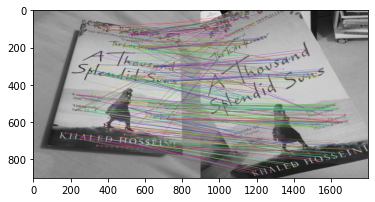

similarity between image F1 0 and 1 is 15.638963360142984


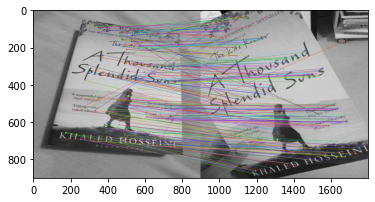

similarity between image F2 0 and 1 is 12.779267202859696


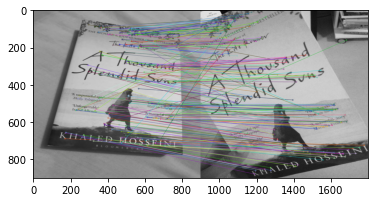

similarity between image F3 0 and 1 is 10.723860589812332
=========two images are similar==========


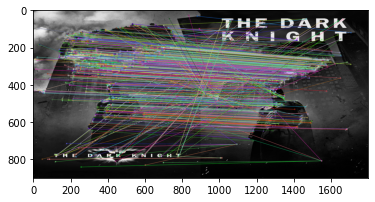

similarity between image F1 0 and 1 is 43.929471032745596


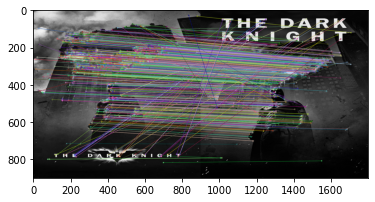

similarity between image F2 0 and 1 is 39.19395465994962


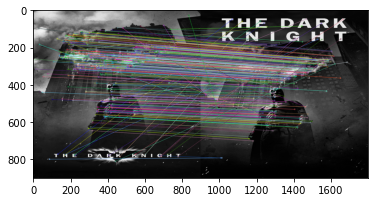

similarity between image F3 0 and 1 is 21.91435768261965
=========two images are similar==========


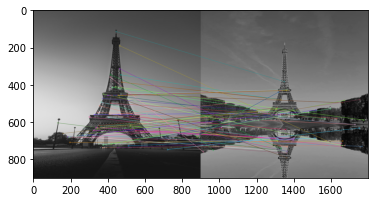

similarity between image F1 0 and 1 is 3.7056367432150314


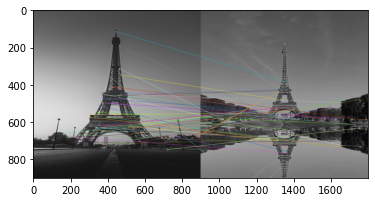

similarity between image F2 0 and 1 is 2.9227557411273484


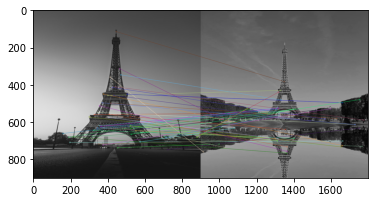

similarity between image F3 0 and 1 is 2.4530271398747394
=========two images are similar==========


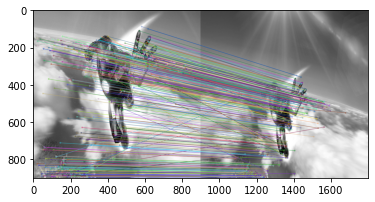

similarity between image F1 0 and 1 is 60.07237635705669


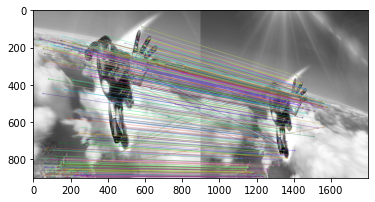

similarity between image F2 0 and 1 is 56.57418576598311


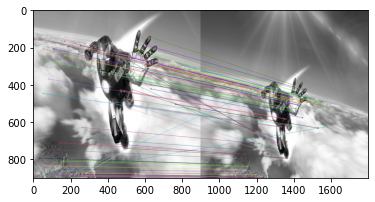

similarity between image F3 0 and 1 is 11.218335343787695
=========two imaages are similar=========


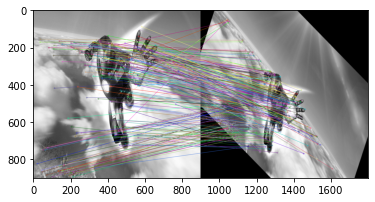

similarity between image F1 0 and 2 is 25.363825363825367


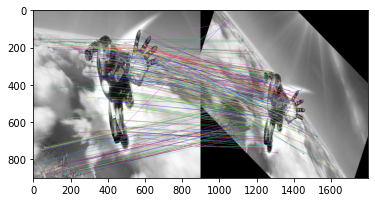

similarity between image F2 0 and 2 is 22.86902286902287


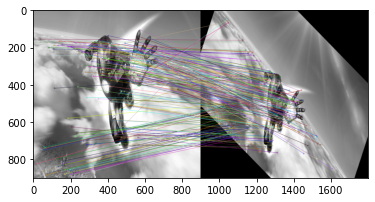

similarity between image F3 0 and 2 is 22.453222453222455
=========two imaages are similar=========


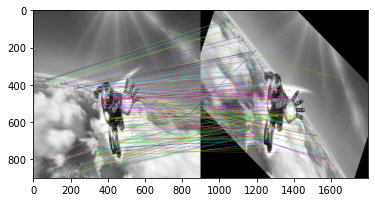

similarity between image F1 1 and 2 is 18.817852834740652


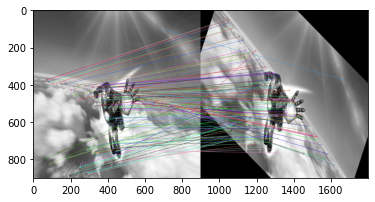

similarity between image F2 1 and 2 is 17.61158021712907


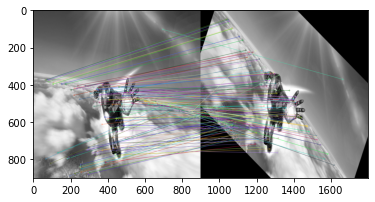

similarity between image F3 1 and 2 is 17.249698431845598
=========two imaages are similar=========


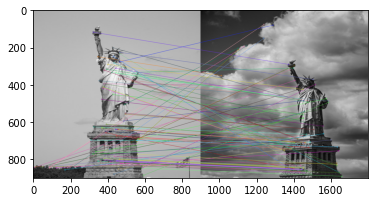

similarity between image F1 0 and 1 is 6.689419795221843


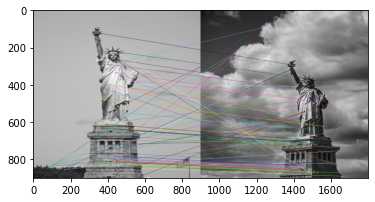

similarity between image F2 0 and 1 is 5.460750853242321


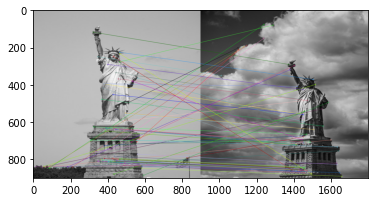

similarity between image F3 0 and 1 is 5.051194539249146
=========two images are similar==========


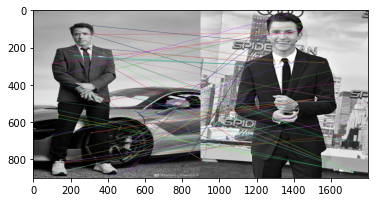

similarity between image F1 0 and 1 is 3.8932146829810903


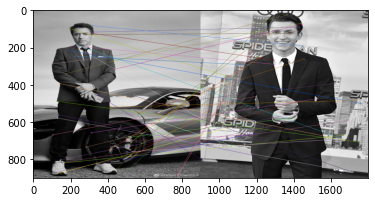

similarity between image F2 0 and 1 is 2.6696329254727478


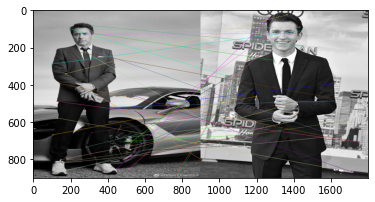

similarity between image F3 0 and 1 is 2.2246941045606228
=========two images are not similar=======


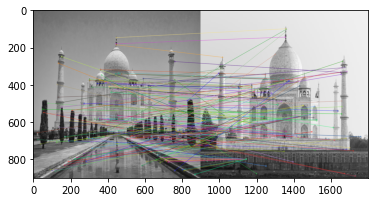

similarity between image F1 0 and 1 is 5.49376474553421


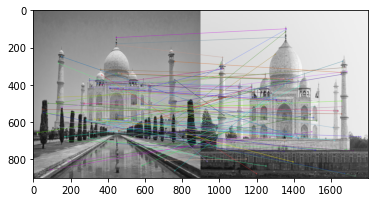

similarity between image F2 0 and 1 is 3.505224132119986


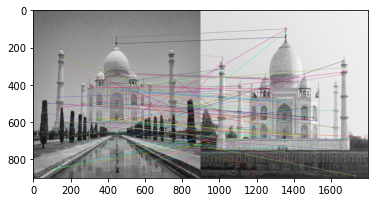

similarity between image F3 0 and 1 is 3.0333670374115265
=========two images are similar==========


In [6]:
images = [] 
images=Read_image("images",'image1')
Algorithm(images)
images=Read_image("images",'image2')
Algorithm(images)
images=Read_image("images",'image3')
Algorithm(images)
images=Read_image("images",'image4')
Algorithm(images)
images=Read_image("images",'image5')
Algorithm(images)
images=Read_image("images",'image6')
Algorithm(images)
images=Read_image("images",'image7')
Algorithm(images)
################################similarithy based threshhold

